In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import losses

In [50]:
df = pdr.get_data_tiingo("MSFT", api_key="aeeaa9dbc8f82f2c361abaa259050d75e736b424")
# df = pdr.get_data_tiingo("600958", api_key="aeeaa9dbc8f82f2c361abaa259050d75e736b424")
df.to_csv("MSFT.csv")
df_stock = pd.read_csv("MSFT.csv")
df_stock.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,MSFT,2016-09-12 00:00:00+00:00,57.05,57.205,55.61,56.00,29302962,52.790444,52.933871,51.457959,51.818840,29302962,0.0,1.0
1,MSFT,2016-09-13 00:00:00+00:00,56.53,56.650,56.05,56.50,30130213,52.309269,52.420309,51.865107,52.281508,30130213,0.0,1.0
2,MSFT,2016-09-14 00:00:00+00:00,56.26,56.630,56.03,56.39,24274273,52.059428,52.401802,51.846600,52.179721,24274273,0.0,1.0
3,MSFT,2016-09-15 00:00:00+00:00,57.19,57.350,55.98,56.15,27062614,52.919991,53.068044,51.800334,51.957641,27062614,0.0,1.0
4,MSFT,2016-09-16 00:00:00+00:00,57.25,57.630,56.75,57.63,44606965,52.975511,53.327139,52.512843,53.327139,44606965,0.0,1.0


In [51]:
df_stock.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,MSFT,2021-09-01 00:00:00+00:00,301.83,305.1900,301.4900,302.865,18983826,301.83,305.1900,301.4900,302.865,18983826,0.0,1.0
1253,MSFT,2021-09-02 00:00:00+00:00,301.15,303.3602,300.1800,302.200,16290545,301.15,303.3602,300.1800,302.200,16290545,0.0,1.0
1254,MSFT,2021-09-03 00:00:00+00:00,301.14,302.6000,300.2600,300.990,14751610,301.14,302.6000,300.2600,300.990,14751610,0.0,1.0
1255,MSFT,2021-09-07 00:00:00+00:00,300.18,301.0900,298.2000,301.005,17184083,300.18,301.0900,298.2000,301.005,17184083,0.0,1.0
1256,MSFT,2021-09-08 00:00:00+00:00,300.21,300.6100,297.4651,299.780,15046819,300.21,300.6100,297.4651,299.780,15046819,0.0,1.0


In [52]:
df_close = df_stock["close"]
df_date = (df_stock["date"].str[:4]+ df_stock["date"].str[5:7]).astype(int)
df_close

0        57.05
1        56.53
2        56.26
3        57.19
4        57.25
         ...  
1252    301.83
1253    301.15
1254    301.14
1255    300.18
1256    300.21
Name: close, Length: 1257, dtype: float64

In [53]:
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

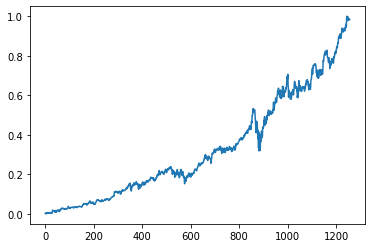

In [54]:
plt.plot(df_close)

In [55]:
train_size = int(len(df_close)*0.7)
test_size = len(df_close) - train_size
close_train = df_close[0:train_size]
close_test = df_close[train_size:len(df_close),:1]
close_train

array([[0.00318048],
       [0.001087  ],
       [0.        ],
       [0.00374411],
       [0.00398567],
       [0.00269737],
       [0.00221426],
       [0.00603889],
       [0.00628045],
       [0.00471033],
       [0.00257659],
       [0.00680382],
       [0.00712589],
       [0.00458956],
       [0.00539474],
       [0.00467008],
       [0.00394541],
       [0.00555578],
       [0.00595837],
       [0.00619993],
       [0.00716615],
       [0.00374411],
       [0.00342204],
       [0.00265711],
       [0.00467008],
       [0.00386489],
       [0.0056363 ],
       [0.00511293],
       [0.00398567],
       [0.01368815],
       [0.01908289],
       [0.01904263],
       [0.0175933 ],
       [0.01545956],
       [0.0145336 ],
       [0.01473489],
       [0.01425178],
       [0.01276219],
       [0.01187648],
       [0.00986352],
       [0.01674786],
       [0.01694915],
       [0.01574137],
       [0.00982326],
       [0.01111156],
       [0.00748822],
       [0.01050767],
       [0.013

In [56]:
def seperate_data(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [57]:
x_train, y_train = seperate_data(close_train, 100)
x_test, y_test = seperate_data(close_test, 100)

In [58]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [59]:
# create the model
model = models.Sequential()

In [60]:
np.version.version

'1.19.5'

In [61]:
model.add(layers.LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(layers.LSTM(50, return_sequences=True))
model.add(layers.LSTM(50))
model.add(layers.Dense(1))

In [62]:
img_new = model.predict(x_test)

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss="mean_squared_error", optimizer="adam")

In [65]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 7s 228ms/step - loss: 0.0148 - val_loss: 0.0972
Epoch 2/100
13/13 [==============================] - 2s 136ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 3/100
13/13 [==============================] - 2s 145ms/step - loss: 5.5836e-04 - val_loss: 0.0083
Epoch 4/100
13/13 [==============================] - 2s 145ms/step - loss: 4.2243e-04 - val_loss: 0.0015
Epoch 5/100
13/13 [==============================] - 2s 161ms/step - loss: 2.6855e-04 - val_loss: 0.0014
Epoch 6/100
13/13 [==============================] - 2s 144ms/step - loss: 2.5914e-04 - val_loss: 0.0013
Epoch 7/100
13/13 [==============================] - 2s 138ms/step - loss: 2.4191e-04 - val_loss: 0.0015
Epoch 8/100
13/13 [==============================] - 2s 127ms/step - loss: 2.4506e-04 - val_loss: 0.0014
Epoch 9/100
13/13 [==============================] - 2s 144ms/step - loss: 2.4692e-04 - val_loss: 0.0016
Epoch 10/100
13/13 [==============================] - 2s 132ms/

13/13 [==============================] - 2s 119ms/step - loss: 1.3902e-04 - val_loss: 0.0018
Epoch 79/100
13/13 [==============================] - 2s 119ms/step - loss: 1.2021e-04 - val_loss: 0.0016
Epoch 80/100
13/13 [==============================] - 2s 120ms/step - loss: 1.1928e-04 - val_loss: 0.0016
Epoch 81/100
13/13 [==============================] - 2s 120ms/step - loss: 1.1665e-04 - val_loss: 0.0018
Epoch 82/100
13/13 [==============================] - 2s 120ms/step - loss: 1.1999e-04 - val_loss: 0.0010
Epoch 83/100
13/13 [==============================] - 2s 120ms/step - loss: 1.2073e-04 - val_loss: 0.0013
Epoch 84/100
13/13 [==============================] - 2s 116ms/step - loss: 1.1633e-04 - val_loss: 0.0016
Epoch 85/100
13/13 [==============================] - 2s 120ms/step - loss: 1.1343e-04 - val_loss: 0.0016
Epoch 86/100
13/13 [==============================] - 2s 120ms/step - loss: 1.1890e-04 - val_loss: 0.0016
Epoch 87/100
13/13 [==============================] - 2s 13

In [18]:
predict_data_train = model.predict(x_train)
predict_data_raw = model.predict(x_test)

In [19]:
predict_data_test = scaler.inverse_transform(predict_data_raw)

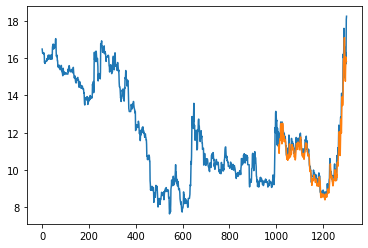

In [20]:
predict_plot = np.empty_like(df_close)
predict_plot[:,:] = np.nan
predict_plot[len(predict_data_train)+200+1 : len(df_close)-1, :] = predict_data_test
plt.plot(scaler.inverse_transform(df_close))
plt.plot(predict_plot)

In [40]:
len(close_test)

391

In [42]:
x_input=close_test[91:].reshape(1,-1)
x_input.shape

(1, 300)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=300
i=0
while(i<60):
    
    if(len(temp_input)>300):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9698265]
301
1 day input [0.47358491 0.41415094 0.34811321 0.43396226 0.40566038 0.41226415
 0.41509434 0.34150943 0.3509434  0.34433962 0.37735849 0.38018868
 0.38301887 0.40849057 0.39622642 0.39433962 0.44528302 0.46509434
 0.46320755 0.40943396 0.38584906 0.38207547 0.39716981 0.46509434
 0.46037736 0.43867925 0.40754717 0.41981132 0.42075472 0.40660377
 0.37924528 0.38490566 0.40849057 0.39245283 0.39150943 0.38962264
 0.39150943 0.37735849 0.34150943 0.34528302 0.31981132 0.29716981
 0.29622642 0.29811321 0.3009434  0.28962264 0.28773585 0.33301887
 0.31698113 0.31037736 0.31226415 0.29716981 0.3990566  0.35471698
 0.35471698 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792
 0.31886792 0.31886792 0.34339623 0.38207547 0.35943396 0.34245283
 0.35566038 0.36603774 0.35188679 0.35471698 0.34716981 0.35188679
 0.33490566 0.30566038 0.31509434 0.32075472 0.33113208 0.29150943
 0.28773585 0.32830189 0.33018868 0.35       0.35943396 0.38679245
 0.36509434 0.35754717 0.35471698 

3 day output [[0.925283]]
4 day input [0.43396226 0.40566038 0.41226415 0.41509434 0.34150943 0.3509434
 0.34433962 0.37735849 0.38018868 0.38301887 0.40849057 0.39622642
 0.39433962 0.44528302 0.46509434 0.46320755 0.40943396 0.38584906
 0.38207547 0.39716981 0.46509434 0.46037736 0.43867925 0.40754717
 0.41981132 0.42075472 0.40660377 0.37924528 0.38490566 0.40849057
 0.39245283 0.39150943 0.38962264 0.39150943 0.37735849 0.34150943
 0.34528302 0.31981132 0.29716981 0.29622642 0.29811321 0.3009434
 0.28962264 0.28773585 0.33301887 0.31698113 0.31037736 0.31226415
 0.29716981 0.3990566  0.35471698 0.35471698 0.31886792 0.31886792
 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792 0.34339623
 0.38207547 0.35943396 0.34245283 0.35566038 0.36603774 0.35188679
 0.35471698 0.34716981 0.35188679 0.33490566 0.30566038 0.31509434
 0.32075472 0.33113208 0.29150943 0.28773585 0.32830189 0.33018868
 0.35       0.35943396 0.38679245 0.36509434 0.35754717 0.35471698
 0.34528302 0.37264151 0.3

6 day output [[0.90994227]]
7 day input [0.41509434 0.34150943 0.3509434  0.34433962 0.37735849 0.38018868
 0.38301887 0.40849057 0.39622642 0.39433962 0.44528302 0.46509434
 0.46320755 0.40943396 0.38584906 0.38207547 0.39716981 0.46509434
 0.46037736 0.43867925 0.40754717 0.41981132 0.42075472 0.40660377
 0.37924528 0.38490566 0.40849057 0.39245283 0.39150943 0.38962264
 0.39150943 0.37735849 0.34150943 0.34528302 0.31981132 0.29716981
 0.29622642 0.29811321 0.3009434  0.28962264 0.28773585 0.33301887
 0.31698113 0.31037736 0.31226415 0.29716981 0.3990566  0.35471698
 0.35471698 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792
 0.31886792 0.31886792 0.34339623 0.38207547 0.35943396 0.34245283
 0.35566038 0.36603774 0.35188679 0.35471698 0.34716981 0.35188679
 0.33490566 0.30566038 0.31509434 0.32075472 0.33113208 0.29150943
 0.28773585 0.32830189 0.33018868 0.35       0.35943396 0.38679245
 0.36509434 0.35754717 0.35471698 0.34528302 0.37264151 0.38207547
 0.36886792 0.37264151

9 day output [[0.8810903]]
10 day input [0.34433962 0.37735849 0.38018868 0.38301887 0.40849057 0.39622642
 0.39433962 0.44528302 0.46509434 0.46320755 0.40943396 0.38584906
 0.38207547 0.39716981 0.46509434 0.46037736 0.43867925 0.40754717
 0.41981132 0.42075472 0.40660377 0.37924528 0.38490566 0.40849057
 0.39245283 0.39150943 0.38962264 0.39150943 0.37735849 0.34150943
 0.34528302 0.31981132 0.29716981 0.29622642 0.29811321 0.3009434
 0.28962264 0.28773585 0.33301887 0.31698113 0.31037736 0.31226415
 0.29716981 0.3990566  0.35471698 0.35471698 0.31886792 0.31886792
 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792 0.34339623
 0.38207547 0.35943396 0.34245283 0.35566038 0.36603774 0.35188679
 0.35471698 0.34716981 0.35188679 0.33490566 0.30566038 0.31509434
 0.32075472 0.33113208 0.29150943 0.28773585 0.32830189 0.33018868
 0.35       0.35943396 0.38679245 0.36509434 0.35754717 0.35471698
 0.34528302 0.37264151 0.38207547 0.36886792 0.37264151 0.36509434
 0.38301887 0.36981132 

12 day output [[0.85524637]]
13 day input [0.38301887 0.40849057 0.39622642 0.39433962 0.44528302 0.46509434
 0.46320755 0.40943396 0.38584906 0.38207547 0.39716981 0.46509434
 0.46037736 0.43867925 0.40754717 0.41981132 0.42075472 0.40660377
 0.37924528 0.38490566 0.40849057 0.39245283 0.39150943 0.38962264
 0.39150943 0.37735849 0.34150943 0.34528302 0.31981132 0.29716981
 0.29622642 0.29811321 0.3009434  0.28962264 0.28773585 0.33301887
 0.31698113 0.31037736 0.31226415 0.29716981 0.3990566  0.35471698
 0.35471698 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792
 0.31886792 0.31886792 0.34339623 0.38207547 0.35943396 0.34245283
 0.35566038 0.36603774 0.35188679 0.35471698 0.34716981 0.35188679
 0.33490566 0.30566038 0.31509434 0.32075472 0.33113208 0.29150943
 0.28773585 0.32830189 0.33018868 0.35       0.35943396 0.38679245
 0.36509434 0.35754717 0.35471698 0.34528302 0.37264151 0.38207547
 0.36886792 0.37264151 0.36509434 0.38301887 0.36981132 0.34716981
 0.34245283 0.370754

15 day output [[0.8426146]]
16 day input [0.39433962 0.44528302 0.46509434 0.46320755 0.40943396 0.38584906
 0.38207547 0.39716981 0.46509434 0.46037736 0.43867925 0.40754717
 0.41981132 0.42075472 0.40660377 0.37924528 0.38490566 0.40849057
 0.39245283 0.39150943 0.38962264 0.39150943 0.37735849 0.34150943
 0.34528302 0.31981132 0.29716981 0.29622642 0.29811321 0.3009434
 0.28962264 0.28773585 0.33301887 0.31698113 0.31037736 0.31226415
 0.29716981 0.3990566  0.35471698 0.35471698 0.31886792 0.31886792
 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792 0.34339623
 0.38207547 0.35943396 0.34245283 0.35566038 0.36603774 0.35188679
 0.35471698 0.34716981 0.35188679 0.33490566 0.30566038 0.31509434
 0.32075472 0.33113208 0.29150943 0.28773585 0.32830189 0.33018868
 0.35       0.35943396 0.38679245 0.36509434 0.35754717 0.35471698
 0.34528302 0.37264151 0.38207547 0.36886792 0.37264151 0.36509434
 0.38301887 0.36981132 0.34716981 0.34245283 0.37075472 0.37358491
 0.4009434  0.40377358

18 day output [[0.84119314]]
19 day input [0.46320755 0.40943396 0.38584906 0.38207547 0.39716981 0.46509434
 0.46037736 0.43867925 0.40754717 0.41981132 0.42075472 0.40660377
 0.37924528 0.38490566 0.40849057 0.39245283 0.39150943 0.38962264
 0.39150943 0.37735849 0.34150943 0.34528302 0.31981132 0.29716981
 0.29622642 0.29811321 0.3009434  0.28962264 0.28773585 0.33301887
 0.31698113 0.31037736 0.31226415 0.29716981 0.3990566  0.35471698
 0.35471698 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792
 0.31886792 0.31886792 0.34339623 0.38207547 0.35943396 0.34245283
 0.35566038 0.36603774 0.35188679 0.35471698 0.34716981 0.35188679
 0.33490566 0.30566038 0.31509434 0.32075472 0.33113208 0.29150943
 0.28773585 0.32830189 0.33018868 0.35       0.35943396 0.38679245
 0.36509434 0.35754717 0.35471698 0.34528302 0.37264151 0.38207547
 0.36886792 0.37264151 0.36509434 0.38301887 0.36981132 0.34716981
 0.34245283 0.37075472 0.37358491 0.4009434  0.40377358 0.40849057
 0.38867925 0.373584

21 day output [[0.8461056]]
22 day input [0.38207547 0.39716981 0.46509434 0.46037736 0.43867925 0.40754717
 0.41981132 0.42075472 0.40660377 0.37924528 0.38490566 0.40849057
 0.39245283 0.39150943 0.38962264 0.39150943 0.37735849 0.34150943
 0.34528302 0.31981132 0.29716981 0.29622642 0.29811321 0.3009434
 0.28962264 0.28773585 0.33301887 0.31698113 0.31037736 0.31226415
 0.29716981 0.3990566  0.35471698 0.35471698 0.31886792 0.31886792
 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792 0.34339623
 0.38207547 0.35943396 0.34245283 0.35566038 0.36603774 0.35188679
 0.35471698 0.34716981 0.35188679 0.33490566 0.30566038 0.31509434
 0.32075472 0.33113208 0.29150943 0.28773585 0.32830189 0.33018868
 0.35       0.35943396 0.38679245 0.36509434 0.35754717 0.35471698
 0.34528302 0.37264151 0.38207547 0.36886792 0.37264151 0.36509434
 0.38301887 0.36981132 0.34716981 0.34245283 0.37075472 0.37358491
 0.4009434  0.40377358 0.40849057 0.38867925 0.37358491 0.3745283
 0.3254717  0.31886792 

24 day output [[0.8516231]]
25 day input [0.46037736 0.43867925 0.40754717 0.41981132 0.42075472 0.40660377
 0.37924528 0.38490566 0.40849057 0.39245283 0.39150943 0.38962264
 0.39150943 0.37735849 0.34150943 0.34528302 0.31981132 0.29716981
 0.29622642 0.29811321 0.3009434  0.28962264 0.28773585 0.33301887
 0.31698113 0.31037736 0.31226415 0.29716981 0.3990566  0.35471698
 0.35471698 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792
 0.31886792 0.31886792 0.34339623 0.38207547 0.35943396 0.34245283
 0.35566038 0.36603774 0.35188679 0.35471698 0.34716981 0.35188679
 0.33490566 0.30566038 0.31509434 0.32075472 0.33113208 0.29150943
 0.28773585 0.32830189 0.33018868 0.35       0.35943396 0.38679245
 0.36509434 0.35754717 0.35471698 0.34528302 0.37264151 0.38207547
 0.36886792 0.37264151 0.36509434 0.38301887 0.36981132 0.34716981
 0.34245283 0.37075472 0.37358491 0.4009434  0.40377358 0.40849057
 0.38867925 0.37358491 0.3745283  0.3254717  0.31886792 0.31698113
 0.31320755 0.3094339

27 day output [[0.85375875]]
28 day input [0.41981132 0.42075472 0.40660377 0.37924528 0.38490566 0.40849057
 0.39245283 0.39150943 0.38962264 0.39150943 0.37735849 0.34150943
 0.34528302 0.31981132 0.29716981 0.29622642 0.29811321 0.3009434
 0.28962264 0.28773585 0.33301887 0.31698113 0.31037736 0.31226415
 0.29716981 0.3990566  0.35471698 0.35471698 0.31886792 0.31886792
 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792 0.34339623
 0.38207547 0.35943396 0.34245283 0.35566038 0.36603774 0.35188679
 0.35471698 0.34716981 0.35188679 0.33490566 0.30566038 0.31509434
 0.32075472 0.33113208 0.29150943 0.28773585 0.32830189 0.33018868
 0.35       0.35943396 0.38679245 0.36509434 0.35754717 0.35471698
 0.34528302 0.37264151 0.38207547 0.36886792 0.37264151 0.36509434
 0.38301887 0.36981132 0.34716981 0.34245283 0.37075472 0.37358491
 0.4009434  0.40377358 0.40849057 0.38867925 0.37358491 0.3745283
 0.3254717  0.31886792 0.31698113 0.31320755 0.30943396 0.30283019
 0.32830189 0.32264151

30 day output [[0.85113937]]
31 day input [0.37924528 0.38490566 0.40849057 0.39245283 0.39150943 0.38962264
 0.39150943 0.37735849 0.34150943 0.34528302 0.31981132 0.29716981
 0.29622642 0.29811321 0.3009434  0.28962264 0.28773585 0.33301887
 0.31698113 0.31037736 0.31226415 0.29716981 0.3990566  0.35471698
 0.35471698 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792
 0.31886792 0.31886792 0.34339623 0.38207547 0.35943396 0.34245283
 0.35566038 0.36603774 0.35188679 0.35471698 0.34716981 0.35188679
 0.33490566 0.30566038 0.31509434 0.32075472 0.33113208 0.29150943
 0.28773585 0.32830189 0.33018868 0.35       0.35943396 0.38679245
 0.36509434 0.35754717 0.35471698 0.34528302 0.37264151 0.38207547
 0.36886792 0.37264151 0.36509434 0.38301887 0.36981132 0.34716981
 0.34245283 0.37075472 0.37358491 0.4009434  0.40377358 0.40849057
 0.38867925 0.37358491 0.3745283  0.3254717  0.31886792 0.31698113
 0.31320755 0.30943396 0.30283019 0.32830189 0.32264151 0.32830189
 0.28867925 0.309433

35 day output [[0.8389268]]
36 day input [0.38962264 0.39150943 0.37735849 0.34150943 0.34528302 0.31981132
 0.29716981 0.29622642 0.29811321 0.3009434  0.28962264 0.28773585
 0.33301887 0.31698113 0.31037736 0.31226415 0.29716981 0.3990566
 0.35471698 0.35471698 0.31886792 0.31886792 0.31886792 0.31886792
 0.31886792 0.31886792 0.31886792 0.34339623 0.38207547 0.35943396
 0.34245283 0.35566038 0.36603774 0.35188679 0.35471698 0.34716981
 0.35188679 0.33490566 0.30566038 0.31509434 0.32075472 0.33113208
 0.29150943 0.28773585 0.32830189 0.33018868 0.35       0.35943396
 0.38679245 0.36509434 0.35754717 0.35471698 0.34528302 0.37264151
 0.38207547 0.36886792 0.37264151 0.36509434 0.38301887 0.36981132
 0.34716981 0.34245283 0.37075472 0.37358491 0.4009434  0.40377358
 0.40849057 0.38867925 0.37358491 0.3745283  0.3254717  0.31886792
 0.31698113 0.31320755 0.30943396 0.30283019 0.32830189 0.32264151
 0.32830189 0.28867925 0.30943396 0.3009434  0.32264151 0.3254717
 0.32358491 0.33584906 

38 day output [[0.83009535]]
39 day input [0.34150943 0.34528302 0.31981132 0.29716981 0.29622642 0.29811321
 0.3009434  0.28962264 0.28773585 0.33301887 0.31698113 0.31037736
 0.31226415 0.29716981 0.3990566  0.35471698 0.35471698 0.31886792
 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792
 0.34339623 0.38207547 0.35943396 0.34245283 0.35566038 0.36603774
 0.35188679 0.35471698 0.34716981 0.35188679 0.33490566 0.30566038
 0.31509434 0.32075472 0.33113208 0.29150943 0.28773585 0.32830189
 0.33018868 0.35       0.35943396 0.38679245 0.36509434 0.35754717
 0.35471698 0.34528302 0.37264151 0.38207547 0.36886792 0.37264151
 0.36509434 0.38301887 0.36981132 0.34716981 0.34245283 0.37075472
 0.37358491 0.4009434  0.40377358 0.40849057 0.38867925 0.37358491
 0.3745283  0.3254717  0.31886792 0.31698113 0.31320755 0.30943396
 0.30283019 0.32830189 0.32264151 0.32830189 0.28867925 0.30943396
 0.3009434  0.32264151 0.3254717  0.32358491 0.33584906 0.3754717
 0.3754717  0.3707547

41 day output [[0.82214326]]
42 day input [0.29716981 0.29622642 0.29811321 0.3009434  0.28962264 0.28773585
 0.33301887 0.31698113 0.31037736 0.31226415 0.29716981 0.3990566
 0.35471698 0.35471698 0.31886792 0.31886792 0.31886792 0.31886792
 0.31886792 0.31886792 0.31886792 0.34339623 0.38207547 0.35943396
 0.34245283 0.35566038 0.36603774 0.35188679 0.35471698 0.34716981
 0.35188679 0.33490566 0.30566038 0.31509434 0.32075472 0.33113208
 0.29150943 0.28773585 0.32830189 0.33018868 0.35       0.35943396
 0.38679245 0.36509434 0.35754717 0.35471698 0.34528302 0.37264151
 0.38207547 0.36886792 0.37264151 0.36509434 0.38301887 0.36981132
 0.34716981 0.34245283 0.37075472 0.37358491 0.4009434  0.40377358
 0.40849057 0.38867925 0.37358491 0.3745283  0.3254717  0.31886792
 0.31698113 0.31320755 0.30943396 0.30283019 0.32830189 0.32264151
 0.32830189 0.28867925 0.30943396 0.3009434  0.32264151 0.3254717
 0.32358491 0.33584906 0.3754717  0.3754717  0.37075472 0.37075472
 0.36037736 0.39339623

44 day output [[0.81572115]]
45 day input [0.3009434  0.28962264 0.28773585 0.33301887 0.31698113 0.31037736
 0.31226415 0.29716981 0.3990566  0.35471698 0.35471698 0.31886792
 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792
 0.34339623 0.38207547 0.35943396 0.34245283 0.35566038 0.36603774
 0.35188679 0.35471698 0.34716981 0.35188679 0.33490566 0.30566038
 0.31509434 0.32075472 0.33113208 0.29150943 0.28773585 0.32830189
 0.33018868 0.35       0.35943396 0.38679245 0.36509434 0.35754717
 0.35471698 0.34528302 0.37264151 0.38207547 0.36886792 0.37264151
 0.36509434 0.38301887 0.36981132 0.34716981 0.34245283 0.37075472
 0.37358491 0.4009434  0.40377358 0.40849057 0.38867925 0.37358491
 0.3745283  0.3254717  0.31886792 0.31698113 0.31320755 0.30943396
 0.30283019 0.32830189 0.32264151 0.32830189 0.28867925 0.30943396
 0.3009434  0.32264151 0.3254717  0.32358491 0.33584906 0.3754717
 0.3754717  0.37075472 0.37075472 0.36037736 0.39339623 0.36226415
 0.32735849 0.3698113

47 day output [[0.8106453]]
48 day input [0.33301887 0.31698113 0.31037736 0.31226415 0.29716981 0.3990566
 0.35471698 0.35471698 0.31886792 0.31886792 0.31886792 0.31886792
 0.31886792 0.31886792 0.31886792 0.34339623 0.38207547 0.35943396
 0.34245283 0.35566038 0.36603774 0.35188679 0.35471698 0.34716981
 0.35188679 0.33490566 0.30566038 0.31509434 0.32075472 0.33113208
 0.29150943 0.28773585 0.32830189 0.33018868 0.35       0.35943396
 0.38679245 0.36509434 0.35754717 0.35471698 0.34528302 0.37264151
 0.38207547 0.36886792 0.37264151 0.36509434 0.38301887 0.36981132
 0.34716981 0.34245283 0.37075472 0.37358491 0.4009434  0.40377358
 0.40849057 0.38867925 0.37358491 0.3745283  0.3254717  0.31886792
 0.31698113 0.31320755 0.30943396 0.30283019 0.32830189 0.32264151
 0.32830189 0.28867925 0.30943396 0.3009434  0.32264151 0.3254717
 0.32358491 0.33584906 0.3754717  0.3754717  0.37075472 0.37075472
 0.36037736 0.39339623 0.36226415 0.32735849 0.36981132 0.3245283
 0.31415094 0.31698113 0

52 day output [[0.80332476]]
53 day input [0.3990566  0.35471698 0.35471698 0.31886792 0.31886792 0.31886792
 0.31886792 0.31886792 0.31886792 0.31886792 0.34339623 0.38207547
 0.35943396 0.34245283 0.35566038 0.36603774 0.35188679 0.35471698
 0.34716981 0.35188679 0.33490566 0.30566038 0.31509434 0.32075472
 0.33113208 0.29150943 0.28773585 0.32830189 0.33018868 0.35
 0.35943396 0.38679245 0.36509434 0.35754717 0.35471698 0.34528302
 0.37264151 0.38207547 0.36886792 0.37264151 0.36509434 0.38301887
 0.36981132 0.34716981 0.34245283 0.37075472 0.37358491 0.4009434
 0.40377358 0.40849057 0.38867925 0.37358491 0.3745283  0.3254717
 0.31886792 0.31698113 0.31320755 0.30943396 0.30283019 0.32830189
 0.32264151 0.32830189 0.28867925 0.30943396 0.3009434  0.32264151
 0.3254717  0.32358491 0.33584906 0.3754717  0.3754717  0.37075472
 0.37075472 0.36037736 0.39339623 0.36226415 0.32735849 0.36981132
 0.3245283  0.31415094 0.31698113 0.31981132 0.32735849 0.31509434
 0.32641509 0.30754717 0.298

55 day output [[0.7985146]]
56 day input [0.31886792 0.31886792 0.31886792 0.31886792 0.31886792 0.31886792
 0.31886792 0.34339623 0.38207547 0.35943396 0.34245283 0.35566038
 0.36603774 0.35188679 0.35471698 0.34716981 0.35188679 0.33490566
 0.30566038 0.31509434 0.32075472 0.33113208 0.29150943 0.28773585
 0.32830189 0.33018868 0.35       0.35943396 0.38679245 0.36509434
 0.35754717 0.35471698 0.34528302 0.37264151 0.38207547 0.36886792
 0.37264151 0.36509434 0.38301887 0.36981132 0.34716981 0.34245283
 0.37075472 0.37358491 0.4009434  0.40377358 0.40849057 0.38867925
 0.37358491 0.3745283  0.3254717  0.31886792 0.31698113 0.31320755
 0.30943396 0.30283019 0.32830189 0.32264151 0.32830189 0.28867925
 0.30943396 0.3009434  0.32264151 0.3254717  0.32358491 0.33584906
 0.3754717  0.3754717  0.37075472 0.37075472 0.36037736 0.39339623
 0.36226415 0.32735849 0.36981132 0.3245283  0.31415094 0.31698113
 0.31981132 0.32735849 0.31509434 0.32641509 0.30754717 0.29811321
 0.25188679 0.2415094

59 day output [[0.7909089]]
[[0.9698265194892883], [0.9671717882156372], [0.9420025944709778], [0.9252830147743225], [0.9184888601303101], [0.9150148034095764], [0.9099422693252563], [0.9018839001655579], [0.891750693321228], [0.8810902833938599], [0.8711047172546387], [0.8624197244644165], [0.855246365070343], [0.8495968580245972], [0.8454140424728394], [0.8426145911216736], [0.8410851359367371], [0.8406747579574585], [0.8411931395530701], [0.8424230813980103], [0.8441353440284729], [0.8461055755615234], [0.8481262922286987], [0.8500155806541443], [0.8516231179237366], [0.852832019329071], [0.8535600900650024], [0.8537587523460388], [0.8534102439880371], [0.8525257110595703], [0.8511393666267395], [0.8493043780326843], [0.8470880389213562], [0.8445663452148438], [0.8418193459510803], [0.8389267921447754], [0.8359644412994385], [0.8330008387565613], [0.8300953507423401], [0.8272950053215027], [0.8246365785598755], [0.8221432566642761], [0.8198272585868835], [0.8176892995834351], [0.815

In [45]:
len(df_close)

1301

In [48]:
day_new=np.arange(1,301)
day_pred=np.arange(301,361)

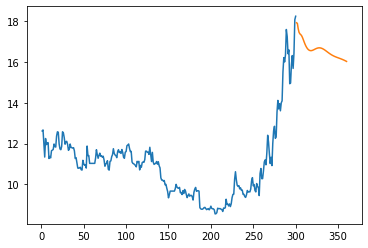

In [49]:
plt.plot(day_new,scaler.inverse_transform(df_close[1001:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))